In [2]:
inFile='/content/drive/MyDrive/LFN/DHFR/DHFR_graph_indicator.txt'
inAdj= '/content/drive/MyDrive/LFN/DHFR/DHFR_A.txt'
node_label= '/content/drive/MyDrive/LFN/DHFR/DHFR_node_labels.txt'
graph_label = '/content/drive/MyDrive/LFN/DHFR/DHFR_graph_labels.txt'

Create main graph and add all sungraph in main graph together

In [3]:
import networkx as nx
import itertools
graphs = [] #a list for all graphs

# Add all graphs to the list
for _ in range(756):
    graph = nx.Graph()
    graphs.append(graph)


print(len(graphs))


756


Read node labels from dataset

In [4]:
node_labels_list = []
with open('/'.join([node_label])) as file:
    for line in file:
        label = int(line.strip())
        node_labels_list.append(label)

Add each node to its own subgraph

In [5]:
aa = -1
with open('/'.join([inFile])) as tmp:
    for line_number, line in enumerate(tmp, start=1):
        a = int(line)-1 # 0 based indexing
        if (aa != a or  a == 755):
          nodes = graphs[aa].nodes()
          with  open('/'.join([inAdj])) as tmp_edge :
            for line_edge in tmp_edge.readlines():
              ni,nj = [ int(a) for a in line_edge.split(',')]
              if ni in nodes:
                graphs[aa].add_edge(ni, nj)
          aa = a

          graphs[a].add_node(line_number)

In [6]:
degrees = graphs[7].degree()
for node, degree in degrees:
    print(f"The degree of node {node} is {degree}.")

The degree of node 241 is 2.
The degree of node 242 is 3.
The degree of node 243 is 2.
The degree of node 244 is 3.
The degree of node 245 is 3.
The degree of node 246 is 3.
The degree of node 247 is 3.
The degree of node 248 is 3.
The degree of node 249 is 3.
The degree of node 250 is 3.
The degree of node 251 is 3.
The degree of node 252 is 3.
The degree of node 253 is 3.
The degree of node 254 is 3.
The degree of node 255 is 1.
The degree of node 256 is 4.
The degree of node 257 is 1.
The degree of node 268 is 1.
The degree of node 269 is 1.
The degree of node 270 is 1.
The degree of node 271 is 1.
The degree of node 272 is 1.
The degree of node 273 is 1.
The degree of node 274 is 1.
The degree of node 275 is 1.
The degree of node 276 is 1.
The degree of node 277 is 1.


add labels to their nodes

In [7]:
ind = 0
for graph in graphs:
  for node in graph.nodes():
      graph.nodes[node]['label'] = node_labels_list[ind]
      ind += 1

In [8]:
# # Print the labels for all nodes
for n in graphs[7].nodes():
  print(f"The label for node {n} is {graphs[7].nodes[n]['label']}.")

The label for node 241 is 1.
The label for node 242 is 1.
The label for node 243 is 1.
The label for node 244 is 1.
The label for node 245 is 1.
The label for node 246 is 1.
The label for node 247 is 1.
The label for node 248 is 1.
The label for node 249 is 1.
The label for node 250 is 1.
The label for node 251 is 1.
The label for node 252 is 1.
The label for node 253 is 7.
The label for node 254 is 6.
The label for node 255 is 7.
The label for node 256 is 6.
The label for node 257 is 6.
The label for node 268 is 6.
The label for node 269 is 6.
The label for node 270 is 6.
The label for node 271 is 6.
The label for node 272 is 6.
The label for node 273 is 6.
The label for node 274 is 6.
The label for node 275 is 7.
The label for node 276 is 7.
The label for node 277 is 17.


add label to each subgraph

In [9]:
with open('/'.join([graph_label])) as tmp:
    for line_number, line in enumerate(tmp, start=1):
        a = int(line_number)-1 # 0 based indexing
        graphs[a].graph['label'] =  line


Print number of nodes and edges in each graph

In [10]:
edge_count = 0
for i in range(len(graphs)):
  print(f"Number of nodes in graph {i} is : {graphs[i].number_of_nodes()}\t  AND  \t number of edges is {graphs[i].number_of_edges()}")
  edge_count +=graphs[i].number_of_edges()

Number of nodes in graph 0 is : 26	  AND  	 number of edges is 27
Number of nodes in graph 1 is : 26	  AND  	 number of edges is 27
Number of nodes in graph 2 is : 27	  AND  	 number of edges is 28
Number of nodes in graph 3 is : 30	  AND  	 number of edges is 31
Number of nodes in graph 4 is : 40	  AND  	 number of edges is 42
Number of nodes in graph 5 is : 41	  AND  	 number of edges is 43
Number of nodes in graph 6 is : 38	  AND  	 number of edges is 40
Number of nodes in graph 7 is : 27	  AND  	 number of edges is 28
Number of nodes in graph 8 is : 27	  AND  	 number of edges is 28
Number of nodes in graph 9 is : 28	  AND  	 number of edges is 29
Number of nodes in graph 10 is : 27	  AND  	 number of edges is 28
Number of nodes in graph 11 is : 41	  AND  	 number of edges is 43
Number of nodes in graph 12 is : 28	  AND  	 number of edges is 29
Number of nodes in graph 13 is : 28	  AND  	 number of edges is 29
Number of nodes in graph 14 is : 43	  AND  	 number of edges is 45
Numbe

plot one of the subgraphs

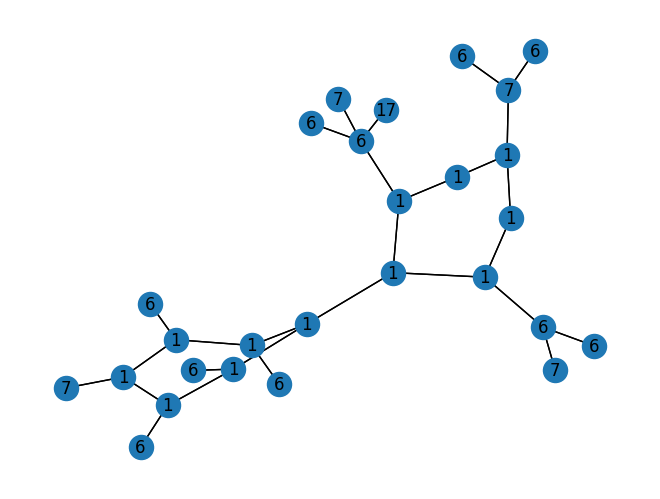

In [11]:

import matplotlib.pyplot as plt
pos = nx.spring_layout(graphs[7])
nx.draw(graphs[7], pos, labels={n: graphs[7].nodes[n]['label'] for n in graphs[7].nodes()})
nx.draw_networkx_edges(graphs[7], pos)

plt.show()

find exact number of graphlets

In [12]:
def find_graphlets_exact(graph, size):
    nodes = graph.nodes()
    graphlets = []

    for sub_nodes in itertools.combinations(nodes, size):
        subgraph = graph.subgraph(sub_nodes)
        if nx.is_connected(subgraph):  # Check if the subgraph is connected
            graphlets.append(subgraph)
    return graphlets



In [13]:
import itertools

# Open a file in write mode
with open('graphlet_counts_exact.txt', 'w') as file:
    # Iterate through each graphlet
    for i, graphlet in enumerate(graphs):
        # Find graphlets of size 3
        graphlet_size_3 = find_graphlets_exact(graphlet, 3)
        count = len(graphlet_size_3)
        file.write(f"{count}\n")

        print(f"Graph number {i + 1}, has {count} graphlet(s) with size 3")


print("Graphlet counts written to 'graphlet_counts.txt'")


Graph number 1, has 41 graphlet(s) with size 3
Graph number 2, has 41 graphlet(s) with size 3
Graph number 3, has 44 graphlet(s) with size 3
Graph number 4, has 48 graphlet(s) with size 3
Graph number 5, has 66 graphlet(s) with size 3
Graph number 6, has 68 graphlet(s) with size 3
Graph number 7, has 63 graphlet(s) with size 3
Graph number 8, has 44 graphlet(s) with size 3
Graph number 9, has 42 graphlet(s) with size 3
Graph number 10, has 45 graphlet(s) with size 3
Graph number 11, has 44 graphlet(s) with size 3
Graph number 12, has 68 graphlet(s) with size 3
Graph number 13, has 44 graphlet(s) with size 3
Graph number 14, has 43 graphlet(s) with size 3
Graph number 15, has 77 graphlet(s) with size 3
Graph number 16, has 42 graphlet(s) with size 3
Graph number 17, has 58 graphlet(s) with size 3
Graph number 18, has 60 graphlet(s) with size 3
Graph number 19, has 74 graphlet(s) with size 3
Graph number 20, has 77 graphlet(s) with size 3
Graph number 21, has 77 graphlet(s) with size 3
G

ESU algorithm

In [14]:
def esu(graph, size):
    # Set to store unique subgraphs
    subgraphs = set()

    # Recursive function for backtracking
    def backtrack(v, visited, current_subgraph):
        # If the current subgraph reaches the desired size, add it to the set
        if len(current_subgraph) == size:
            subgraphs.add(tuple(sorted(current_subgraph)))
            return

        # Mark the current node as visited and add it to the current subgraph
        visited[v] = True
        current_subgraph.add(v)

        # Explore neighbors of the current node
        for neighbor in graph.neighbors(v):
            # If the neighbor is not visited, recursively explore it
            if not visited[neighbor]:
                backtrack(neighbor, visited.copy(), current_subgraph.copy())

    # Iterate through all nodes in the graph
    for node in graph.nodes():
        # Start backtracking from each unvisited node
        backtrack(node, {n: False for n in graph.nodes()}, set())

    # Convert the set of subgraphs to a list and return
    return list(subgraphs)


In [15]:
subgraph_size = 3

data_list_esu = []
list_esu_len = []

for i, graph_esu in enumerate(graphs):
    esu_result = esu(graph_esu, subgraph_size)
    list_esu_len.append([i+1 , len(esu_result)])
    for j , esu_sub_result in enumerate(esu_result):
      data_list_esu.append([i+1 , j+1 , esu_sub_result])

In [16]:
# Open a file in write mode
with open('graphlet_counts_approx.txt', 'w') as file:
    gg_3 = []

    # Iterate through each graphlet
    for i, graphlet in enumerate(graphs):
        # Find graphlets of size 3
        graphlet_size_3 = esu(graphlet, 3)
        count = len(graphlet_size_3)

        # Append the count to the list
        gg_3.append(count)

        # Write the count to the file
        file.write(f"{count}\n")


        print(f"Graph number {i + 1}, has approximately {count} graphlet(s) with size 3")

print("Graphlet counts written to 'graphlet_counts_approx.txt'")


Graph number 1, has approximately 38 graphlet(s) with size 3
Graph number 2, has approximately 38 graphlet(s) with size 3
Graph number 3, has approximately 39 graphlet(s) with size 3
Graph number 4, has approximately 44 graphlet(s) with size 3
Graph number 5, has approximately 62 graphlet(s) with size 3
Graph number 6, has approximately 65 graphlet(s) with size 3
Graph number 7, has approximately 60 graphlet(s) with size 3
Graph number 8, has approximately 39 graphlet(s) with size 3
Graph number 9, has approximately 40 graphlet(s) with size 3
Graph number 10, has approximately 42 graphlet(s) with size 3
Graph number 11, has approximately 39 graphlet(s) with size 3
Graph number 12, has approximately 64 graphlet(s) with size 3
Graph number 13, has approximately 40 graphlet(s) with size 3
Graph number 14, has approximately 40 graphlet(s) with size 3
Graph number 15, has approximately 68 graphlet(s) with size 3
Graph number 16, has approximately 39 graphlet(s) with size 3
Graph number 17, 

color-coding

In [17]:
import random
import itertools
from math import factorial

def random_coloring(graph, k):
    color_assignment = {}
    for node in graph.nodes:
        color_assignment[node] = random.randint(1, k)
    nx.set_node_attributes(graph, color_assignment, 'color')

def count_colorful(graph, pattern):
    # Maintain a dictionary to store the colors of nodes and their subgraphs
    node_colors = {}
    for node in graph.nodes:
        node_colors[node] = graph.nodes[node]['color']

    count = 0  # Local count for this specific subgraph
    # Check subgraphs for each combination of nodes
    for subgraph_nodes in itertools.combinations(graph.nodes, len(pattern)):
        subgraph_colors = set()
        for node in subgraph_nodes:
            subgraph_colors.add(node_colors[node])

        # Check if the subgraph colors are distinct
        if len(subgraph_colors) == len(subgraph_nodes):
            count += 1

    return count

def color_coding_count(G, H, t):
    total_count = 0  # Accumulator for total count across iterations
    for i in range(t):
        global_count = 0  # Global count for this iteration
        random_coloring(G, len(H))
        tmp_count = count_colorful(G, H)
        global_count += tmp_count
        total_count += global_count

    # Calculate the average count over all iterations
    average_count = total_count / t
    return round((average_count * pow(len(H), len(H))) / (factorial(len(H)) * t), 3)


In [18]:
import networkx as nx

# Define a graphlet with three nodes forming a line
H = nx.path_graph(3)

# Open a file in write mode
with open('estimated_counts_all_subgraphs.txt', 'w') as file:
    # Iterate through each graph in the array
    for i, G in enumerate(graphs):
        # Call the Color-Coding algorithm
        t_value = 100  # You can adjust the number of iterations (t) as needed
        result = round(color_coding_count(G, H, t_value) , 3 )

        # Write the result to the file
        file.write(f"{result}\n")

        # Print the result (optional)
        print(f"Graph number {i + 1}: Estimated count of H in G: {result}")

# Print a message indicating that the estimated counts have been written to the file
print("Estimated counts for all subgraphs written to 'estimated_counts_all_subgraphs.txt'")


Graph number 1: Estimated count of H in G: 26.489
Graph number 2: Estimated count of H in G: 25.96
Graph number 3: Estimated count of H in G: 29.08
Graph number 4: Estimated count of H in G: 40.135
Graph number 5: Estimated count of H in G: 97.949
Graph number 6: Estimated count of H in G: 105.798
Graph number 7: Estimated count of H in G: 84.123
Graph number 8: Estimated count of H in G: 29.38
Graph number 9: Estimated count of H in G: 28.989
Graph number 10: Estimated count of H in G: 32.833
Graph number 11: Estimated count of H in G: 28.803
Graph number 12: Estimated count of H in G: 106.739
Graph number 13: Estimated count of H in G: 32.503
Graph number 14: Estimated count of H in G: 32.856
Graph number 15: Estimated count of H in G: 124.038
Graph number 16: Estimated count of H in G: 29.317
Graph number 17: Estimated count of H in G: 70.876
Graph number 18: Estimated count of H in G: 77.546
Graph number 19: Estimated count of H in G: 105.894
Graph number 20: Estimated count of H i

count number of cycles

In [19]:
def count_rounds(graph, length):
    graph = graph.to_directed()
    nodes = graph.nodes()
    rounds = 0

    for sub_nodes in itertools.combinations(nodes, length):
        subgraph = graph.subgraph(sub_nodes)
        if nx.is_connected(subgraph):  # Check if the subgraph is connected
            cycles = list(nx.simple_cycles(subgraph))
            if len(cycles) > 0:
                rounds += len(cycles)
    return rounds


In [20]:
import networkx as nx

# Assuming graphs[1] is your graph (replace this with your graph)
G = graphs[1].to_directed()

# Find cycles and filter by length
cycles_of_length_6_set = {tuple(sorted(cycle)) for cycle in nx.simple_cycles(G) if len(cycle) == 6}

# Convert the set of cycles back to a list for printing
cycles_of_length_6 = list(cycles_of_length_6_set)

# Print the cycles
print("Cycles of length 6:", cycles_of_length_6)

# Count the number of cycles of length 6
num_cycles_of_length_6 = len(cycles_of_length_6)

print(f"Number of cycles of length 6: {num_cycles_of_length_6}")


Cycles of length 6: [(37, 38, 39, 40, 41, 42), (31, 32, 33, 34, 35, 36)]
Number of cycles of length 6: 2


In [21]:
import networkx as nx

# Open a file in write mode
with open('cycles_count_of_length_6.txt', 'w') as file:
    # Iterate through each graph in the array
    for i, G in enumerate(graphs):
        # Assuming the graph needs to be directed
        G = G.to_directed()

        # Find cycles and filter by length
        cycles_of_length_6_set = {tuple(sorted(cycle)) for cycle in nx.simple_cycles(G) if len(cycle) == 6}

        # Write the count to the file
        file.write(f"{len(cycles_of_length_6_set)}\n")

        # Print the count for the current graph (optional)
        print(f"Graph number {i + 1}: Number of cycles of length 6: {len(cycles_of_length_6_set)}")


print("Cycle counts for all graphs written to 'cycles_count_of_length_6.txt'")


Graph number 1: Number of cycles of length 6: 2
Graph number 2: Number of cycles of length 6: 2
Graph number 3: Number of cycles of length 6: 2
Graph number 4: Number of cycles of length 6: 2
Graph number 5: Number of cycles of length 6: 3
Graph number 6: Number of cycles of length 6: 3
Graph number 7: Number of cycles of length 6: 3
Graph number 8: Number of cycles of length 6: 2
Graph number 9: Number of cycles of length 6: 2
Graph number 10: Number of cycles of length 6: 2
Graph number 11: Number of cycles of length 6: 2
Graph number 12: Number of cycles of length 6: 3
Graph number 13: Number of cycles of length 6: 2
Graph number 14: Number of cycles of length 6: 2
Graph number 15: Number of cycles of length 6: 3
Graph number 16: Number of cycles of length 6: 2
Graph number 17: Number of cycles of length 6: 2
Graph number 18: Number of cycles of length 6: 2
Graph number 19: Number of cycles of length 6: 3
Graph number 20: Number of cycles of length 6: 3
Graph number 21: Number of cy

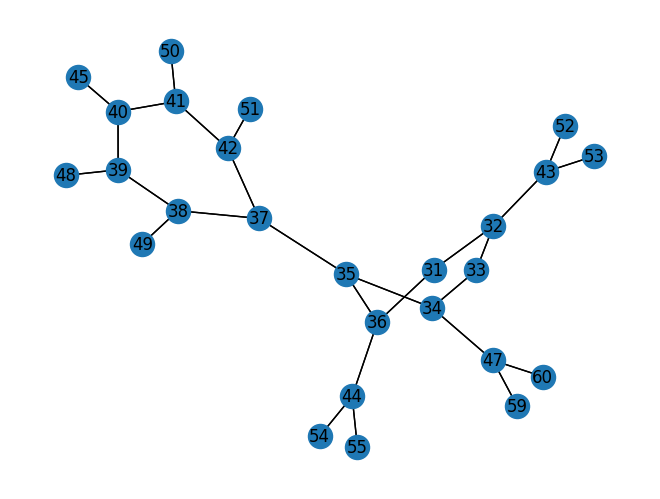

In [22]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming graphs[1] is your graph (replace this with your graph)
G = graphs[1]

# Draw the graph with node numbers as labels and edges
pos = nx.spring_layout(G)
node_labels = {n: str(n) for n in G.nodes()}  # Use the node number as label
nx.draw(G, pos, with_labels=True, labels=node_labels)
nx.draw_networkx_edges(G, pos)

# Show the plot
plt.show()


Embedding part

In [25]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


Computing transition probabilities:   0%|          | 0/26 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 180.03it/s]


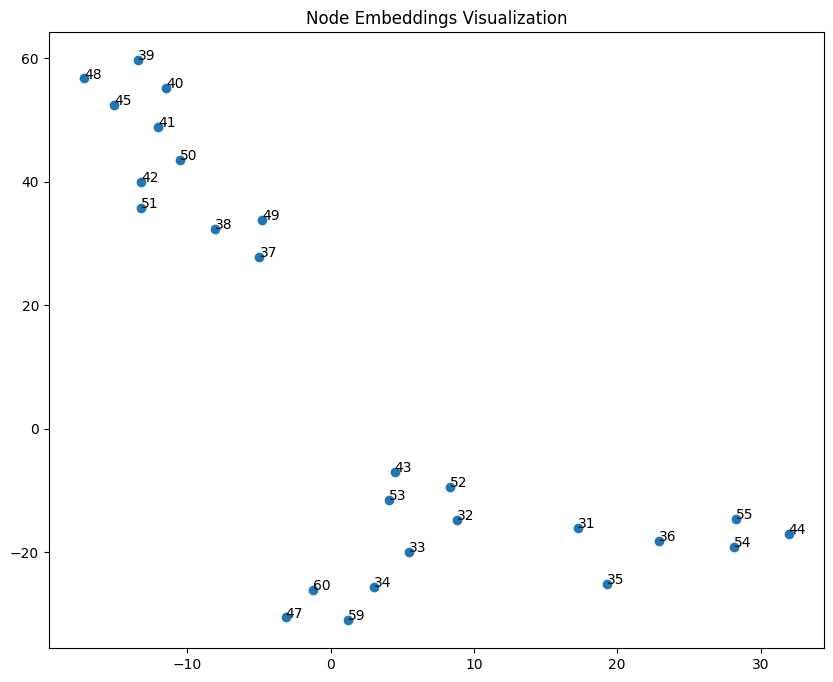

In [26]:
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE



# Specify the number of walks and walk length
num_walks = 10
walk_length = 30

# Initialize Node2Vec with your graph
node2vec = Node2Vec(graphs[1], dimensions=64, walk_length=walk_length, num_walks=num_walks)


# Embed nodes
model = node2vec.fit(window=5, min_count=1, batch_words=4)

# Access the learned node embeddings
embeddings = model.wv

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings.vectors)

# Plot the embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

# Annotate the points with node labels
for i, label in enumerate(embeddings.index_to_key):
    plt.annotate(label, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title("Node Embeddings Visualization")
plt.show()


In [27]:
def find_graphlets(graph, size):
    nodes = graph.nodes()
    graphlets = []

    for sub_nodes in itertools.combinations(nodes, size):
        subgraph = graph.subgraph(sub_nodes)
        if nx.is_connected(subgraph):  # Check if the subgraph is connected
            graphlets.append(subgraph)
    return graphlets



In [28]:
graphlet_size_3 = []

for graphlet in graphs:
    graphlet_size_3.append(find_graphlets(graphlet, 3))


In [29]:
import networkx as nx
from node2vec import Node2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import itertools


graph_taze = nx.Graph()
for i, subgraph in enumerate(graphs):
    graph_taze.add_node(i, label=subgraph.graph.get('label', 0))

# Create edges between subgraphs based on the sum of the sizes of graphlets
for i in range(len(graphs)):
    for j in range(i + 1, len(graphs)):
        # Find graphlets of length 3 for the two subgraphs
        graphlets_i = graphlet_size_3[i]
        graphlets_j = graphlet_size_3[j]


        # graphlets_i = gg_3[i]
        # graphlets_j = gg_3[j]

        # Calculate the sum of sizes of graphlets
        sum_sizes = len(graphlets_i) + len(graphlets_j)
        # sum_sizes = graphlets_i + graphlets_j


        # Use the sum of sizes as the weight for the edge
        graph_taze.add_edge(i, j, weight=sum_sizes)


In [30]:
node2vec = Node2Vec(graph_taze, dimensions=16, walk_length=10, num_walks=1)
model = node2vec.fit(window=5, min_count=1, batch_words=4)


Computing transition probabilities:   0%|          | 0/756 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


In [31]:
# Store the node embeddings (feature vectors) learned by the algorithm
embeddings = []
# Store the class labels of subgraphs
labels = []

for node in graph_taze.nodes():
    label = graph_taze.nodes[node].get('label', 0)  # Default to label 0 if not assigned

    # Check if the node is in the vocabulary
    if str(node) in model.wv:
        labels.append(label)
        embeddings.append(model.wv[str(node)])
    else:
        print(f"Node {node} not in vocabulary, skipping.")

In [32]:
label_mapping = {label: idx for idx, label in enumerate(set(labels))}
numeric_labels = [label_mapping[label] for label in labels]

In [33]:
from sklearn.metrics import accuracy_score

if len(set(labels)) < 2:
    print("Not enough samples for train-test split. Add more labeled subgraphs.")
else:
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(embeddings, numeric_labels, test_size=0.2, random_state=42)

    # Train Logistic Regression classifier
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    # Make predictions
    predictions = classifier.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy}")

Accuracy: 0.6052631578947368


Plot embedding

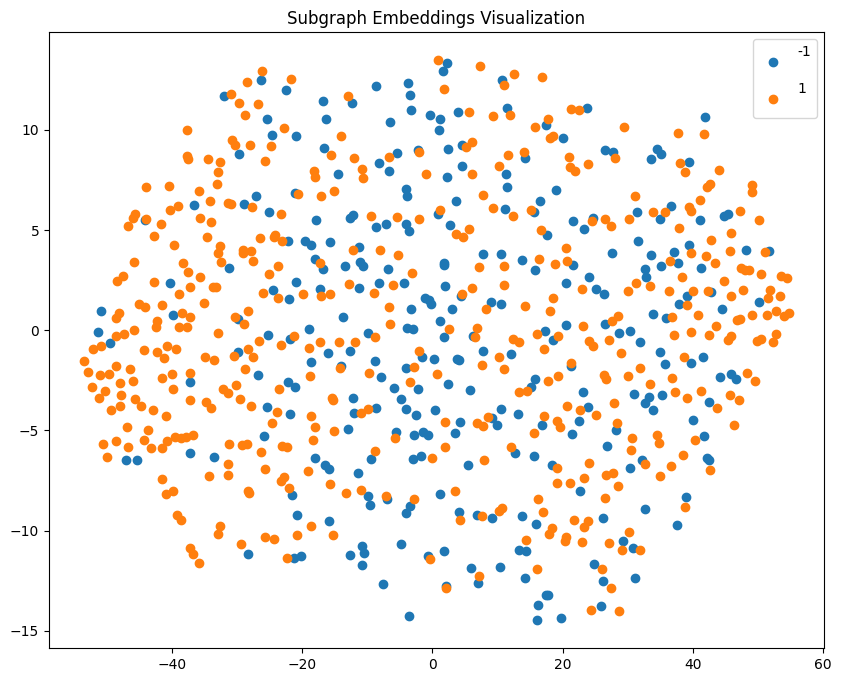

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


embeddings = model.wv.vectors
labels = [graph_taze.nodes[node].get('label') for node in graph_taze.nodes() if str(node) in model.wv]


tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
for i, label in enumerate(set(labels)):
    indices = [j for j, l in enumerate(labels) if l == label]
    plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], label=label)

plt.legend()
plt.title("Subgraph Embeddings Visualization")
plt.show()


use PyTorch tensors

Epoch [10/100], Loss: 0.6881
Epoch [20/100], Loss: 0.6694
Epoch [30/100], Loss: 0.6711
Epoch [40/100], Loss: 0.6691
Epoch [50/100], Loss: 0.6683
Epoch [60/100], Loss: 0.6680
Epoch [70/100], Loss: 0.6676
Epoch [80/100], Loss: 0.6673
Epoch [90/100], Loss: 0.6670
Epoch [100/100], Loss: 0.6667
Test Accuracy: 0.5987


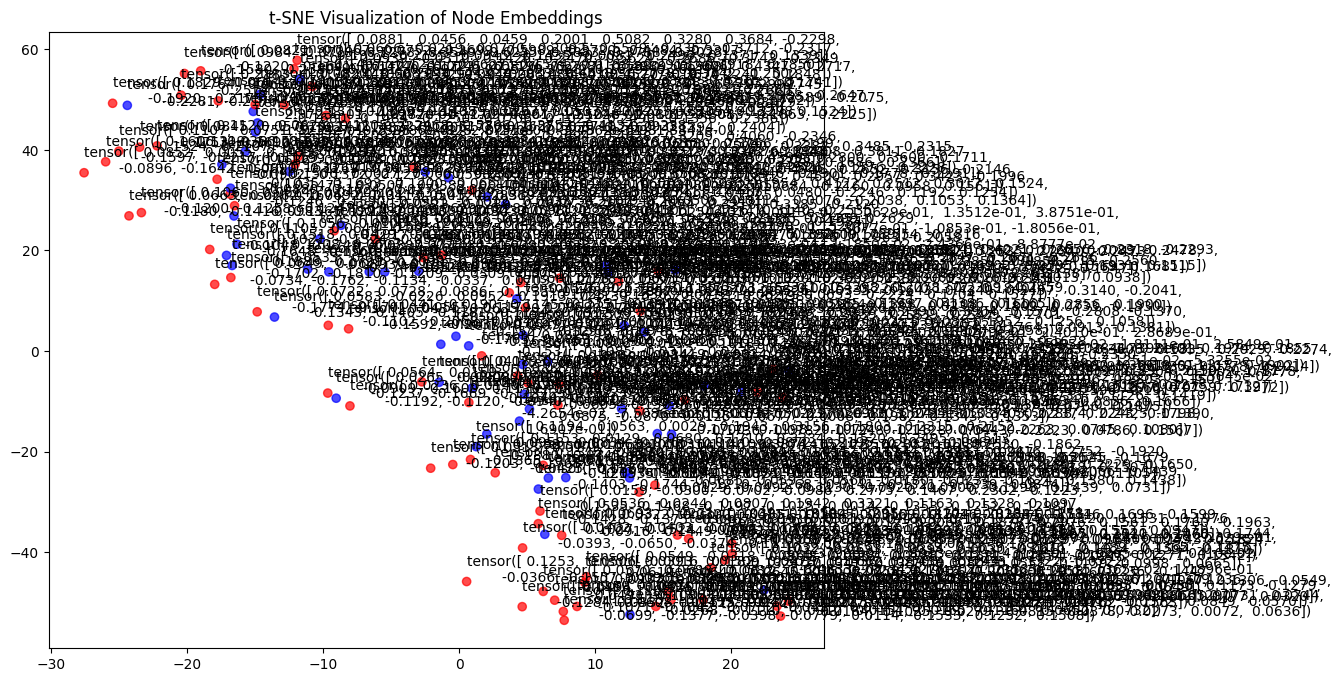

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from node2vec import Node2Vec
if len(set(labels)) < 2:
    print("Not enough samples for train-test split. Add more labeled subgraphs.")
else:
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(embeddings, numeric_labels, test_size=0.2, random_state=42)

    # Convert features and labels to PyTorch tensors
    X_train = torch.FloatTensor(X_train)
    X_test = torch.FloatTensor(X_test)
    y_train = torch.LongTensor(y_train)
    y_test = torch.LongTensor(y_test)

    # Define a two-layer neural network model using PyTorch
    class TwoLayerModel(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(TwoLayerModel, self).__init__()
            self.layer1 = nn.Linear(input_size, hidden_size)
            self.relu = nn.ReLU()
            self.layer2 = nn.Linear(hidden_size, output_size)

        def forward(self, x):
            x = self.layer1(x)
            x = self.relu(x)
            x = self.layer2(x)
            return x

    # Train the two-layer neural network model
    input_size = embeddings[0].shape[0]
    hidden_size = 128
    output_size = len(set(labels))  # Adjust output size based on the number of classes
    model = TwoLayerModel(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4, nesterov=True)

    num_epochs = 100
    for epoch in range(num_epochs):
        outputs = model(X_train)
        optimizer.zero_grad()
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Evaluate the two-layer neural network model
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)
        accuracy = accuracy_score(y_test, predicted)
        print(f"Test Accuracy: {accuracy:.4f}")

    # Apply t-SNE for dimensionality reduction to 2D
    tsne = TSNE(n_components=2, perplexity=5, random_state=42)
    embeddings_2d = tsne.fit_transform(X_test)

    # Plot the embeddings
    plt.figure(figsize=(10, 8))
    colors = ['red' if label == 1 else 'blue' for label in y_test]
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors, alpha=0.7)

    # Annotate the points with node labels
    for i, label in enumerate(map(str, X_test)):
        plt.annotate(label, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

    plt.title("t-SNE Visualization of Node Embeddings")
    plt.show()

use sum of degree centrality for similarity function

In [36]:
import networkx as nx
from node2vec import Node2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


graph_taze = nx.Graph()
for i, subgraph in enumerate(graphs):
    graph_taze.add_node(i, label=subgraph.graph.get('label', 0))

# Create edges between subgraphs based on the sum of degree centrality as similarity
for i in range(len(graphs)):
    for j in range(i + 1, len(graphs)):
        # Calculate degree centrality for nodes in subgraphs
        centrality_i = sum(nx.degree_centrality(graphs[i]).values())
        centrality_j = sum(nx.degree_centrality(graphs[j]).values())

        # Use the sum of degree centrality as the similarity measure
        similarity = centrality_i + centrality_j

        if similarity != 0:
            # print(similarity)
            graph_taze.add_edge(i, j, weight=similarity)
            # If the similarity is 0, don't add an edge.

node2vec = Node2Vec(graph_taze, dimensions=16, walk_length=10, num_walks=1)
model = node2vec.fit(window=5, min_count=1, batch_words=4)


Computing transition probabilities:   0%|          | 0/756 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


In [37]:
# Store the node embeddings (feature vectors) learned by the algorithm
embeddings = []
# Store the class labels of subgraphs
labels = []

for node in graph_taze.nodes():
    label = graph_taze.nodes[node].get('label', 0)  # Default to label 0 if not assigned

    # Check if the node is in the vocabulary
    if str(node) in model.wv:
        labels.append(label)
        embeddings.append(model.wv[str(node)])
    else:
        print(f"Node {node} not in vocabulary, skipping.")

label_mapping = {label: idx for idx, label in enumerate(set(labels))}
numeric_labels = [label_mapping[label] for label in labels]


from sklearn.metrics import accuracy_score

if len(set(labels)) < 2:
    print("Not enough samples for train-test split. Add more labeled subgraphs.")
else:
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(embeddings, numeric_labels, test_size=0.2, random_state=42)

    # Train Logistic Regression classifier
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    # Make predictions
    predictions = classifier.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy}")

Accuracy: 0.5986842105263158
